In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('training_data.csv')

In [3]:
df = df.set_index(df['patient_id'])
df = df.drop(columns = 'patient_id')

In [4]:
for columns in df:
    print(columns, " :",len(df[columns].unique()))

standard_lab_parameter_name  : 5
parameter_value  : 1410
unit  : 30
created_at  : 5802
reference_high  : 65
reference_low  : 49
age_group  : 4
gender  : 4


In [5]:
df['gender'].unique().tolist()

['male', 'female', 'Female', 'mAle']

In [6]:
df = df.replace('Female','female')
df = df.replace('mAle','male')

In [7]:
chloride = df[df['standard_lab_parameter_name']=='Chloride']

In [8]:
cl=chloride.groupby(['age_group'])

In [9]:
x=[]
y=[]
for name,group in cl:
    x.append(name)
    y.append(len(group))
    print(name," : ",len(group))

adult  :  925
child  :  11
old  :  246
teen  :  14


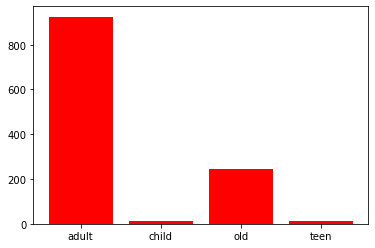

In [10]:
plt.bar(x,y,color='red')
plt.show()

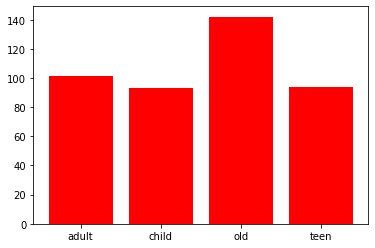

In [11]:
plt.bar(x,cl['parameter_value'].agg(np.mean),color = 'red')
plt.show()

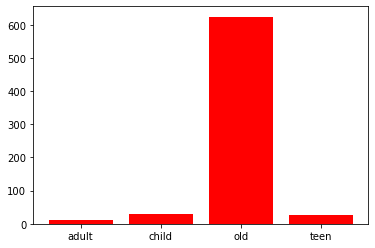

In [12]:
plt.bar(x,cl['parameter_value'].agg(np.std),color = 'red')
plt.show()

In [13]:
cld=chloride.groupby(['age_group','gender'])

In [14]:
for name,group in cld:
    print(name,group)

('adult', 'female')            standard_lab_parameter_name  parameter_value    unit  \
patient_id                                                        
50                            Chloride           104.30  mmol/l   
89                            Chloride           103.00  mmol/l   
144                           Chloride           105.70  mmol/l   
186                           Chloride           103.21  mmol/l   
217                           Chloride           103.30  mmol/l   
...                                ...              ...     ...   
9354                          Chloride           104.80  mmol/l   
9444                          Chloride             2.10   pg/ml   
9681                          Chloride           100.00  mmol/l   
9801                          Chloride           100.00  mmol/l   
9927                          Chloride           104.00  mmol/l   

                                  created_at  reference_high  reference_low  \
patient_id                   

In [15]:
print(cld['parameter_value'].agg(np.mean))

age_group  gender
adult      female    101.378586
           male      101.756404
child      female    102.000000
           male       86.095000
old        female    103.735185
           male      146.770091
teen       male       93.619286
Name: parameter_value, dtype: float64


In [16]:
print(cld['parameter_value'].agg(np.std))

age_group  gender
adult      female     14.701806
           male       11.734750
child      female      1.870829
           male       41.974670
old        female      3.301684
           male      661.453964
teen       male       27.072665
Name: parameter_value, dtype: float64


In [17]:
print(cld['parameter_value'].agg(np.median))

age_group  gender
adult      female    104.00
           male      103.00
child      female    101.00
           male      102.95
old        female    103.00
           male      103.00
teen       male      102.45
Name: parameter_value, dtype: float64
